In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Lendo os dados

In [27]:
df_DailyLife = pd.read_csv('Data/weighted-survey-data-2012/DailyLife.csv')
df_Discrimination = pd.read_csv('Data/weighted-survey-data-2012/Discrimination.csv')

print('Size of df_DailyLife:', len(df_DailyLife))
print('Size of df_Discrimination:', len(df_Discrimination))

Size of df_DailyLife: 8426
Size of df_Discrimination: 1221


### Concatenando os dados

In [28]:
df_concat = pd.concat([df_DailyLife, df_Discrimination])

print('Size of df_concat:', len(df_concat))
df_concat.head()

Size of df_concat: 9647


,CountryName,subset,question_code,question_label,answer,percentage,weight
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8.0,-1.0
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34.0,-0.5
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45.0,0.5
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9.0,1.0
4,Austria,Gay,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,4.0,-1.0


### Computando o peso total para cada linha (peso * porcentagem / 100)

In [29]:
df_concat['total_weight'] = df_concat.apply(lambda row: row['weight'] * row['percentage'] / 100, axis=1)
df_concat.head()

,CountryName,subset,question_code,question_label,answer,percentage,weight,total_weight
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8.0,-1.0,-0.080
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34.0,-0.5,-0.170
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45.0,0.5,0.225
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9.0,1.0,0.090
4,Austria,Gay,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,4.0,-1.0,-0.040


### Plotando um histograma para o peso total dos dados do grupo de homens bissexuais

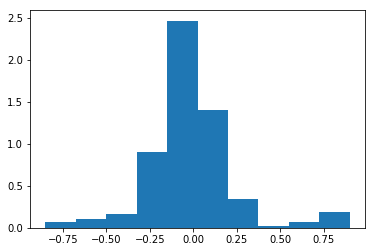

In [30]:
plt.hist(df_concat.loc[df_concat['subset'] == 'Bisexual men']['total_weight'], density=True)
plt.show()

### Plotando um histograma para o peso total dos dados do grupo de gays

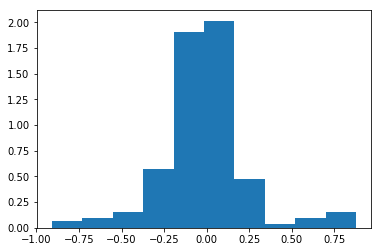

In [23]:
plt.hist(df_concat.loc[df_concat['subset'] == 'Gay']['total_weight'], density=True)
plt.show()

- Vemos que para ambos os casos, temos alta probabilidade de termos um peso total = 0. Com isso, não podemos concluir nada sobre ações (boas ou ruins, como por exemplo o machismo), levando a respostas piores ou melhores para as perguntas em ambos grupos.